In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

# all installed, also pip install yfinance

In [3]:
# Sharpe Ratio compares investments historical / projected returns relative to benchmark
# using historical precendents or expected variaiblity of returns

def sharpeRatio(assetReturn, riskFreeReturn, stdOfAssetAccessReturn):
  sharpeRatio = (assetReturn - riskFreeReturn) / stdOfAssetAccessReturn
  return sharpeRatio

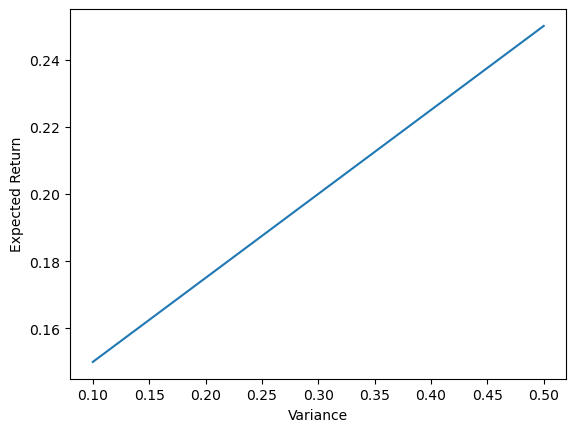

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Efficient Frontier
# Return the securities with highest return at a given level of risk

"""
    Expected return,
    Variance/ Standard Deviation as a measure of the variability of returns, also known as risk and
    The covariance of one asset’s return to that of another asset.
"""

# The higher the STD, the greater the risk

# Pass in a list of stocks, and I will graph the efficient frontier. Also pass in your risk tolerance level, and it will return the highest return of rate.
# Risk level is a decimal, so .2 = 20% STD 
def efficientFrontier(stocks: pd.DataFrame, riskLevel=.2):
  plt.plot(stocks['variance'], stocks['expectedReturn'])
  plt.ylabel('Expected Return')
  plt.xlabel('Variance')
  plt.show()

# Ticker, stock return, std variability of returns
stocks = [('AAPL', 0.15, 0.10), ('TSLA', 0.25, 0.5)]
portfolio = pd.DataFrame(stocks, columns=['ticker', 'expectedReturn', 'variance'])

# df.pct_change()

efficientFrontier(portfolio)

# Could go a step further and have to calculate expectedReturn + variance given stock data


In [5]:
# For each stock, calculate the STD using the last 30 days of data

import yfinance as yf

nvda = yf.Ticker('NVDA')

data = nvda.history(period='1mo')

data['Close'].std()

15.032167054030504

In [6]:
import yfinance as yf

'''
20% in MSFT
40% in AMZN
30% in AAPL
10% in NVDA

Creating portfolio:
'''

msft = yf.Ticker('MSFT').history(period='4mo')
amzn = yf.Ticker('AMZN').history(period='4mo')
aapl = yf.Ticker('AAPL').history(period='4mo')
nvda = yf.Ticker('NVDA').history(period='4mo')

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,54740800,0.0,0.0
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,79729500,0.0,0.0
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,56488900,0.0,0.0
2023-03-24 00:00:00-04:00,270.309998,271.670013,263.549988,267.790009,45492000,0.0,0.0
2023-03-27 00:00:00-04:00,268.369995,270.000000,263.649994,265.309998,36049500,0.0,0.0


In [7]:
import pandas as pd

# Normed return useful for calculations we will do
for stock_df in (msft, amzn, aapl, nvda): 
	stock_df['Normed Return'] = stock_df['Close'] / stock_df.iloc[0]['Close']

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normed Return
Date,,,,,,,,
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,54740800,0.0,0.0,1.656040
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,79729500,0.0,0.0,1.673044
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,56488900,0.0,0.0,1.718745
2023-03-24 00:00:00-04:00,270.309998,271.670013,263.549988,267.790009,45492000,0.0,0.0,1.692702
2023-03-27 00:00:00-04:00,268.369995,270.000000,263.649994,265.309998,36049500,0.0,0.0,1.677026


In [8]:
# Use normed return with allocation % to track our overall portfolio return
for stock_df, percentage in zip((msft, amzn, aapl, nvda), [.2, .4, .3, .1]):
  stock_df['Allocation'] = stock_df['Normed Return'] * percentage

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normed Return,Allocation
Date,,,,,,,,,
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,54740800,0.0,0.0,1.656040,0.165604
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,79729500,0.0,0.0,1.673044,0.167304
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,56488900,0.0,0.0,1.718745,0.171874
2023-03-24 00:00:00-04:00,270.309998,271.670013,263.549988,267.790009,45492000,0.0,0.0,1.692702,0.169270
2023-03-27 00:00:00-04:00,268.369995,270.000000,263.649994,265.309998,36049500,0.0,0.0,1.677026,0.167703


In [9]:
# Roleplay like our overall portfolio started out with $1 million
for stock_df in (msft, amzn, aapl, nvda):
  stock_df['Position Value'] = stock_df['Allocation'] * 1_000_000

nvda.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normed Return,Allocation,Position Value
Date,,,,,,,,,,
2023-03-21 00:00:00-04:00,261.799988,263.920013,253.809998,261.989990,54740800,0.0,0.0,1.656040,0.165604,165604.044534
2023-03-22 00:00:00-04:00,264.250000,275.890015,262.369995,264.679993,79729500,0.0,0.0,1.673044,0.167304,167304.396840
2023-03-23 00:00:00-04:00,271.149994,274.989990,266.899994,271.910004,56488900,0.0,0.0,1.718745,0.171874,171874.491523
2023-03-24 00:00:00-04:00,270.309998,271.670013,263.549988,267.790009,45492000,0.0,0.0,1.692702,0.169270,169270.239909
2023-03-27 00:00:00-04:00,268.369995,270.000000,263.649994,265.309998,36049500,0.0,0.0,1.677026,0.167703,167702.623339


In [10]:
# Get all the of our position's values
all_positions = [msft['Position Value'], amzn['Position Value'], aapl['Position Value'], nvda['Position Value']]

# Create a new Dataframe using these values, axis = 1 means each list is its own column
portfolio_val = pd.concat(all_positions, axis=1)

# Add column names
portfolio_val.columns = ['MSFT', 'AMZN', 'AAPL', 'NVDA']

portfolio_val['Total'] = portfolio_val.sum(axis=1)

portfolio_val.tail()

,MSFT,AMZN,AAPL,NVDA,Total
Date,,,,,
2023-03-21 00:00:00-04:00,227056.367474,428355.524762,331833.014330,165604.044534,1.152849e+06
2023-03-22 00:00:00-04:00,225820.660806,420223.523808,328812.190235,167304.396840,1.142161e+06
2023-03-23 00:00:00-04:00,230274.205952,420266.108742,331103.835643,171874.491523,1.153519e+06
2023-03-24 00:00:00-04:00,232687.584810,417796.702250,333853.848279,169270.239909,1.153608e+06
2023-03-27 00:00:00-04:00,229212.653339,417413.535285,329749.682983,167702.623339,1.144078e+06


<AxesSubplot: xlabel='Date'>

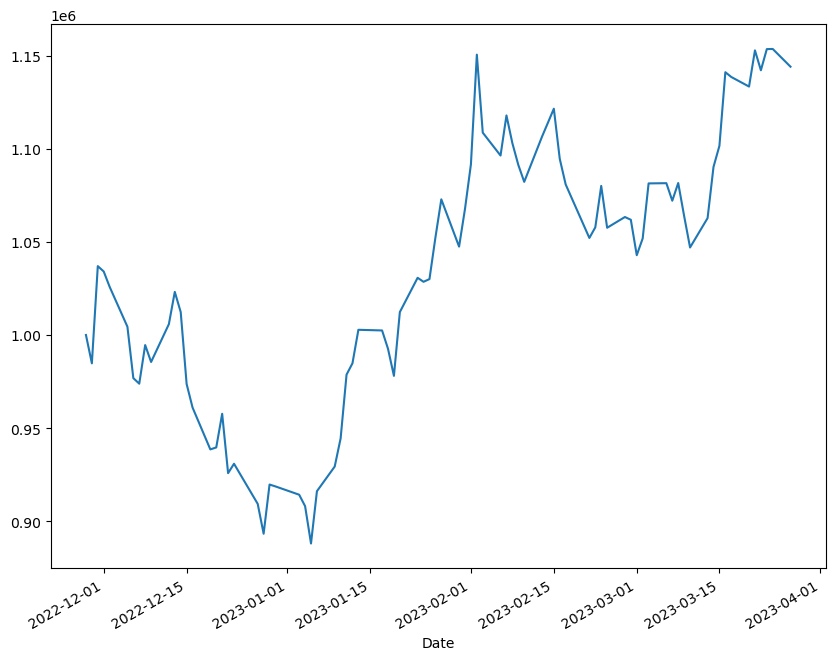

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val["Total"].plot(figsize=(10, 8))

<AxesSubplot: xlabel='Date'>

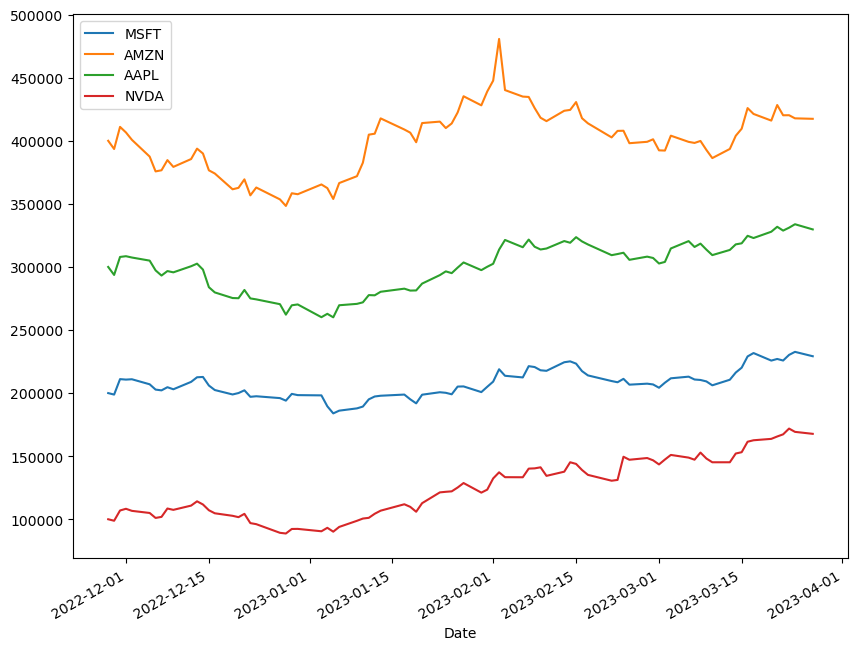

In [12]:
portfolio_val.drop('Total', axis=1).plot(figsize=(10,8))

In [13]:
# Daily Return
portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)

In [14]:
# average daily return
portfolio_val['Daily Return'].mean()

0.0018564576871504168

In [15]:
# standard deviation
portfolio_val['Daily Return'].std()

0.01984101948574673

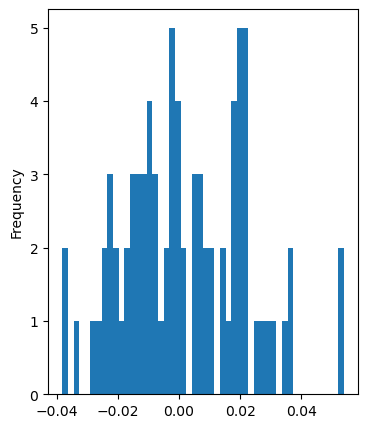

In [16]:
portfolio_val['Daily Return'].plot(kind='hist', bins=50, figsize=(4,5))
cum_return = 100 * (portfolio_val['Total'][-1]/portfolio_val['Total'][0] - 1)